## Importing the libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=cf84efc3ae30ed5bf4f2893e9de70eb635ca9a1891d0d964d8000b1a824a664d
  Stored in directory: c:\users\jagar\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [2]:
from apyori import apriori

In [6]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header=None)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(7501, 20)

## Data Preprocessing

In [10]:
transactions=[]

for i in range(0,7501):
    transactions.append( [ str(df.values[i,j]) for j in range(0,20) ]  )

In [12]:
transactions = np.array(transactions)

In [13]:
transactions

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

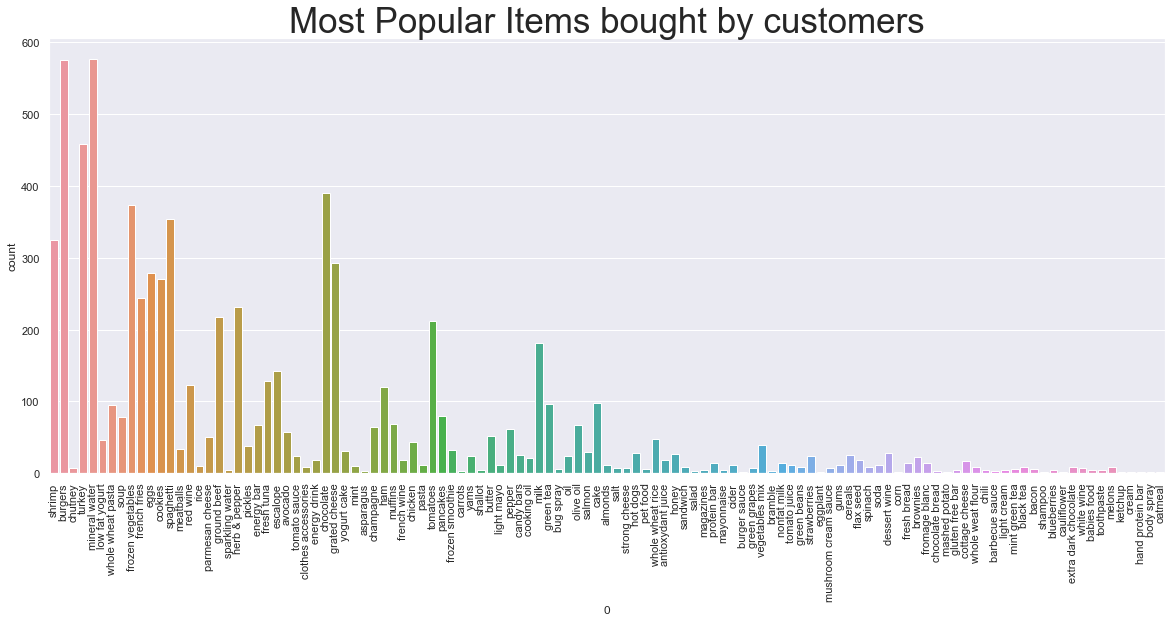

In [23]:
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(df[0])
plt.title("Most Popular Items bought by customers", fontsize=35)
plt.xticks(rotation= 90)
plt.show()


## Association rule mining

In [24]:
transactions = list(transactions)

In [38]:
rules = apriori(transactions,min_support=0.001,min_confidence=0.2, min_lift=2,min_length=2)

In [39]:
rules

<generator object apriori at 0x0000029D2C3C64A0>

In [35]:
rules

<generator object apriori at 0x0000029D2C434270>

In [40]:
result = list(rules)

In [41]:
result

[RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)]),
 RelationRecord(items=frozenset({'asparagus', 'milk'}), support=0.0013331555792560992, ordered_statistics=[OrderedStatistic(items_base=frozenset({'asparagus'}), items_add=frozenset({'milk'}), confidence=0.2857142857142857, lift=2.2048794826572604)]),
 RelationRecord(items=frozenset({'babies food', 'chocolate'}), support=0.0017331022530329288, ordered_statistics=[OrderedStatistic(items_base=frozenset({'babies food'}), items_add=frozenset({'chocolate'}), confidence=0.3823529411764706, lift=2.3336284880103384)]),
 RelationRecord(items=frozenset({'burgers', 'bacon'}), support=0.001999733368884149, ordered_statistics=[OrderedStatistic(items_base=frozenset({'bacon'}), items_add=frozenset({'burgers'}), confidence=0.2307692307692308, lift=2.64678

In [44]:
result[0]

RelationRecord(items=frozenset({'burgers', 'almonds'}), support=0.005199306759098787, ordered_statistics=[OrderedStatistic(items_base=frozenset({'almonds'}), items_add=frozenset({'burgers'}), confidence=0.25490196078431376, lift=2.923577382023146)])